In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## example with rolling a die

# die probabilities (weighted)
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

# confirm sum to 1
print(f1+f2+f3+f4+f5+f6)

# expected value
expval = 1*f1 + 2*f2 + 3*f3 + 4*f4 + 5*f5 + 6*f6

# generate "population"
population = [ 1, 1, 2, 2, 3, 4, 5, 6 ]
for i in range(20):
    population = np.hstack((population,population))

nPop = len(population)

# draw sample of 8 rolls
sample = np.random.choice(population,8)

1.0


2.9997607330599063
2.7432539682539683


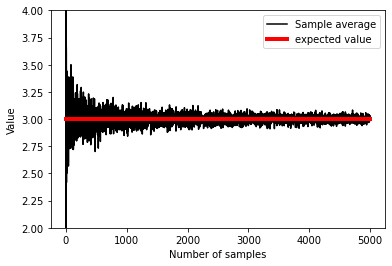

In [3]:
## experiment: draw larger and larger samples

k = 5000  # maximum number of samples
sampleAve = np.zeros(k)

for i in range(k):
    idx = np.floor(np.random.rand(i+1)*nPop)
    sampleAve[i] = np.mean( population[idx.astype(int)] )


plt.plot(sampleAve,'k')
plt.plot([1,k],[expval,expval],'r',linewidth=4)
plt.xlabel('Number of samples')
plt.ylabel('Value')
plt.ylim([expval-1, expval+1])
plt.legend(('Sample average','expected value'))

# mean of samples converges to population estimate quickly:
print( np.mean(sampleAve) )
print( np.mean(sampleAve[:9]) )

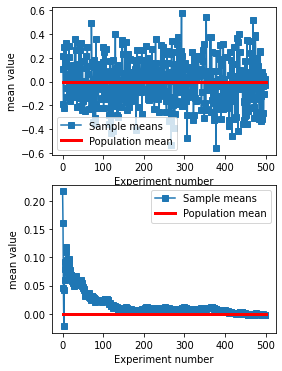

In [4]:
## Another example from a previous lecture (sampleVariability) (slightly adapted)

# generate population data with known mean
populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)  # demean


# get means of samples
samplesize   = 30
numberOfExps = 500
samplemeans  = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0,populationN,samplesize)
    samplemeans[expi] = np.mean(population[ sampleidx ])


# show the results!
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(samplemeans,'s-')
ax[0].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[0].set_xlabel('Experiment number')
ax[0].set_ylabel('mean value')
ax[0].legend(('Sample means','Population mean'))

ax[1].plot(np.cumsum(samplemeans) / np.arange(1,numberOfExps+1),'s-')
ax[1].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('mean value')
ax[1].legend(('Sample means','Population mean'))

plt.show()

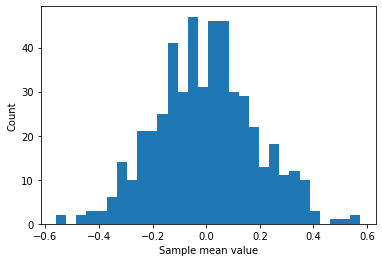

In [5]:
## some foreshadowing...

plt.hist(samplemeans,30)
plt.xlabel('Sample mean value')
plt.ylabel('Count')
plt.show()